# **Loan Approvals** 💸

# Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Visualization

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Encoding Categorical Data

We need to encode 3 categorical columns using LabelEncoder. They will be converted to binary data.

In [6]:
from sklearn.preprocessing import LabelEncoder
columnas = [" education", " self_employed", " loan_status"]
encoder = LabelEncoder()
for columna in columnas:
  df[columna]=encoder.fit_transform(df[columna])
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


We have got the negative data represented as 1 and reverse.  

In [7]:
df[" education"] = df[" education"].replace({0 :1, 1: 0})
df[" loan_status"] = df[" loan_status"].replace({0 :1, 1: 0})

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# EDA

## Histograms

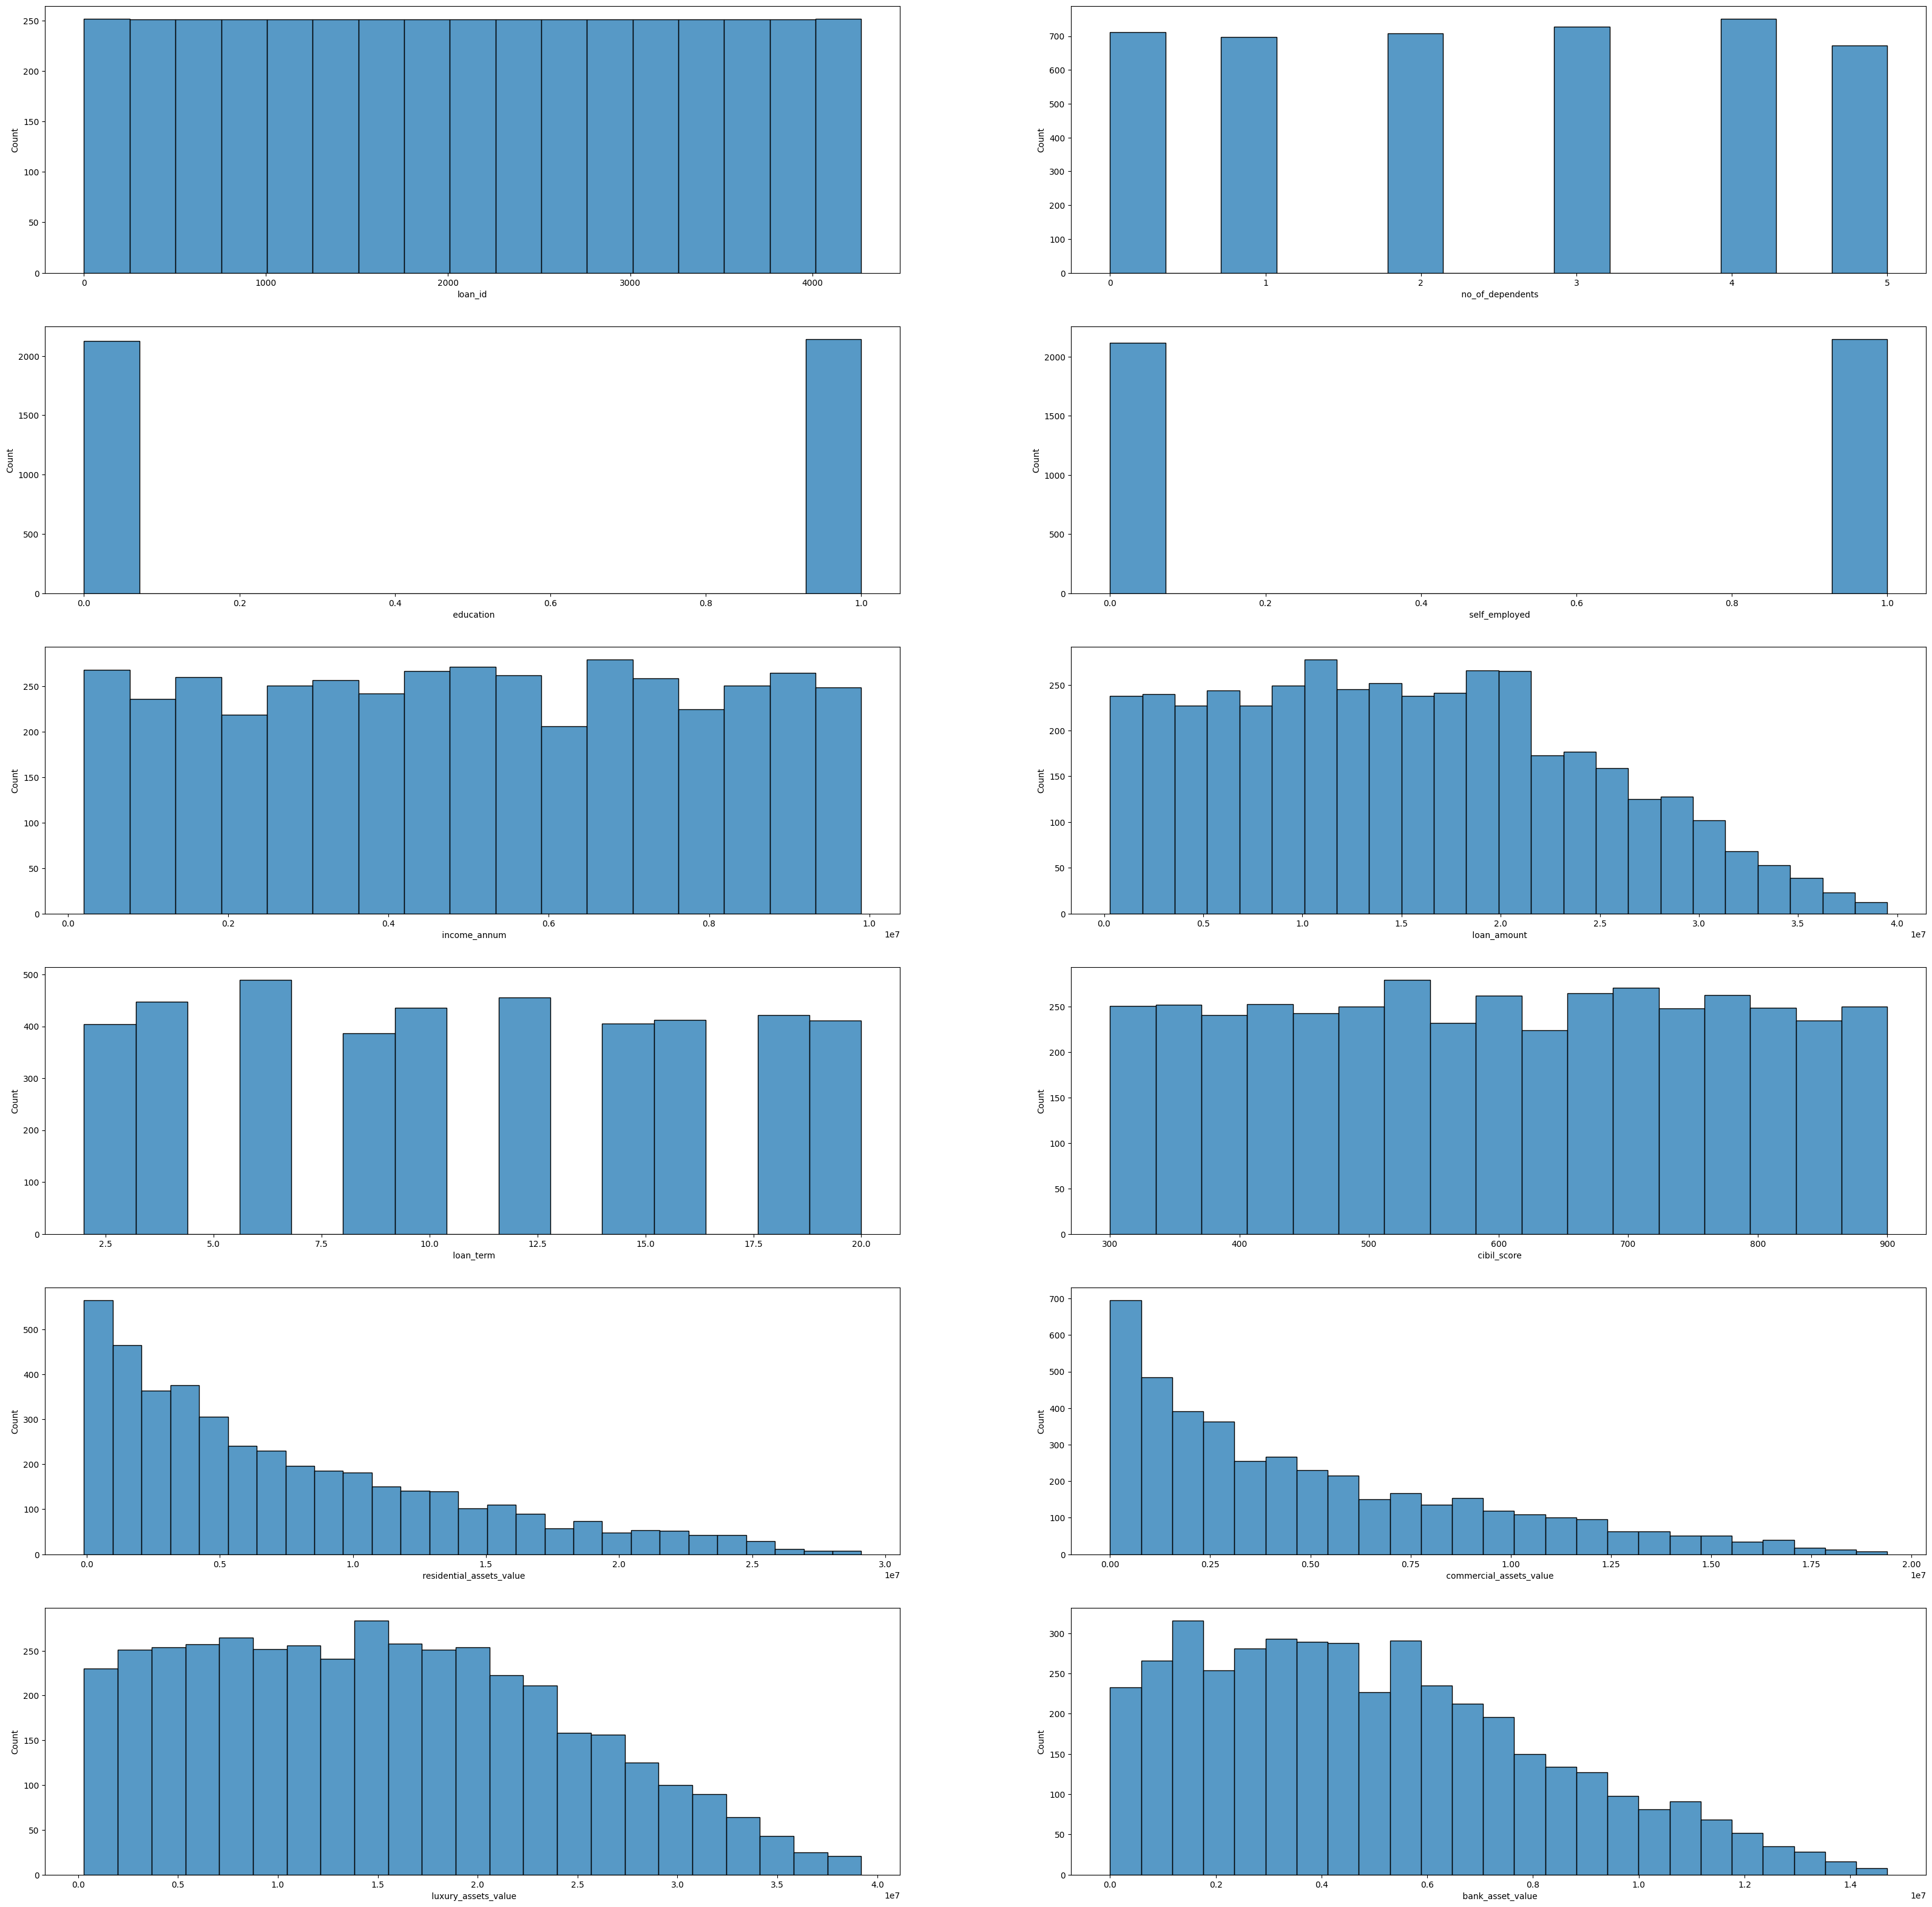

In [9]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], ax = ax)

As we can see in the histograms, the variables don't follow a Gaussian distribution. We will try to transform them later.

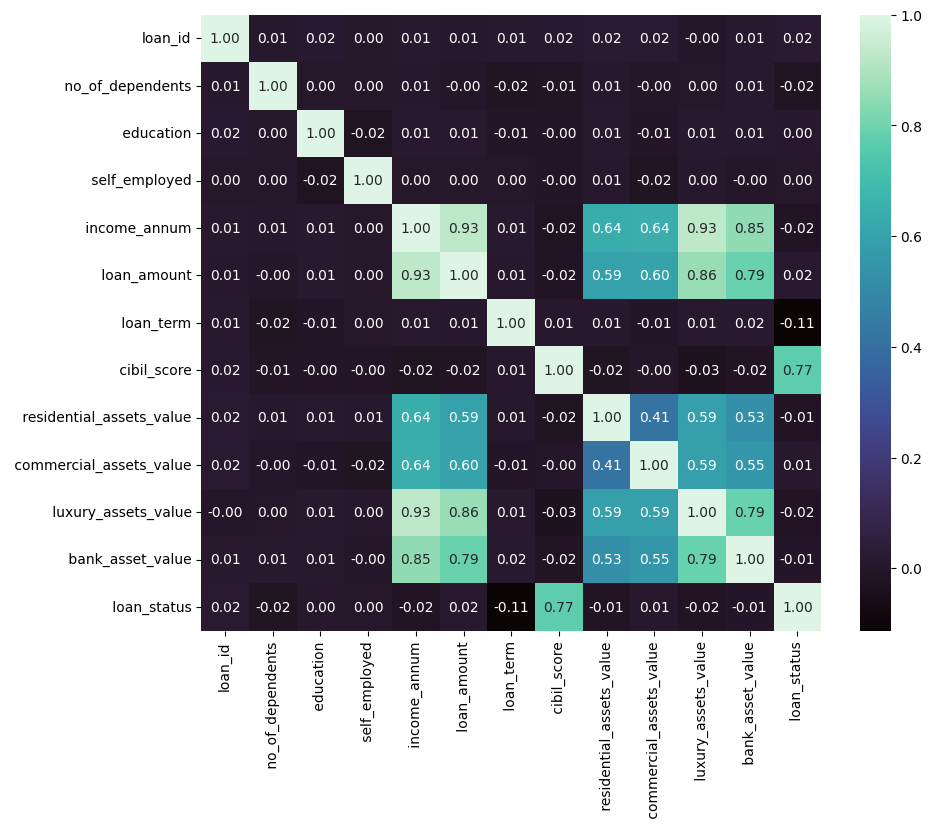

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap = "mako", fmt = ".2f", ax = ax )
ax.set_xticklabels(ax.get_xticklabels())
ax.set_yticklabels(ax.get_yticklabels())
plt.show()

Having a look to this heatmap, we find out that there is not much correlation between our target variable ("loan_status") and the rest of them. As an exception there is one very good correlated with it, cibil_score, which is the total score of credit of a person depending of different factors.

## Boxplot Cibil Score vs Target Variable

Text(0.5, 1.0, 'Target vs Cibil Score')

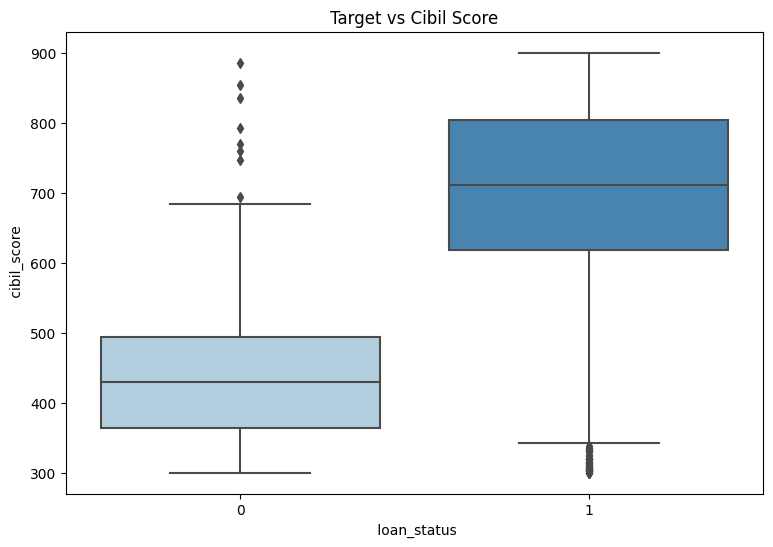

In [11]:
plt.figure(figsize=(9,6))
sns.boxplot(x = " loan_status", y = " cibil_score", data = df, palette = "Blues")
plt.title("Target vs Cibil Score")

In [12]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

We will drop the columns with 0 correlation, more than 0.80 and useless for our model.





In [13]:
df = df.drop(["loan_id", " education", " self_employed", " loan_amount", " income_annum"], axis = 1)
df.head()

,no_of_dependents,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,12,778,2400000,17600000,22700000,8000000,1
1,0,8,417,2700000,2200000,8800000,3300000,0
2,3,20,506,7100000,4500000,33300000,12800000,0
3,3,8,467,18200000,3300000,23300000,7900000,0
4,5,20,382,12400000,8200000,29400000,5000000,0


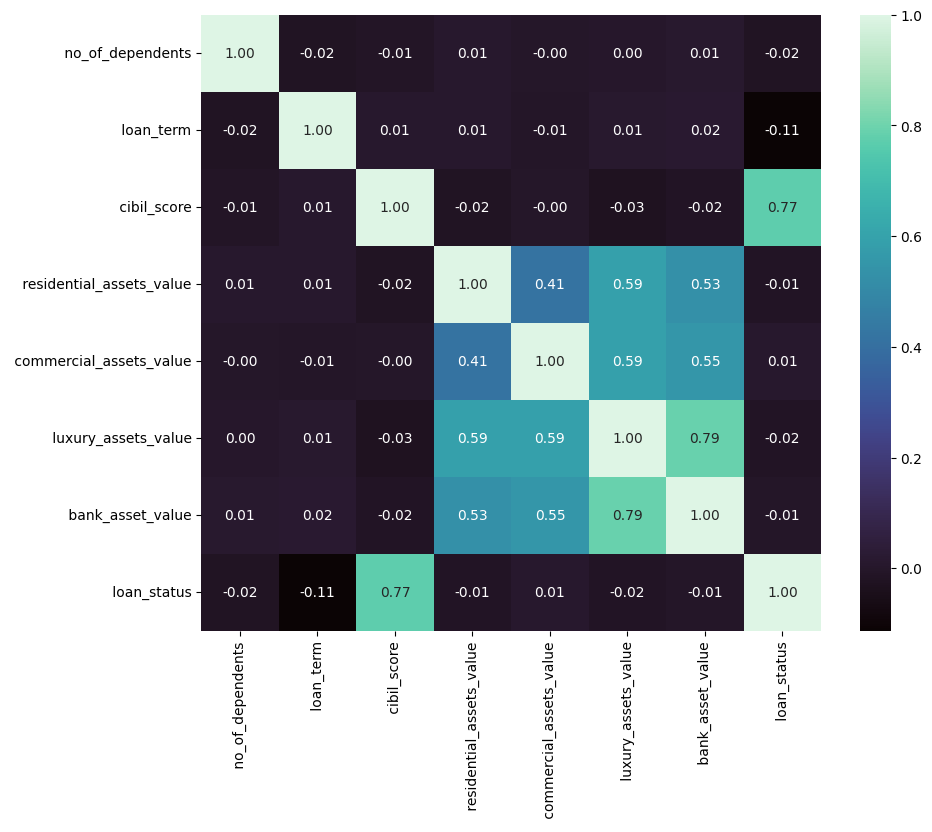

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap = "mako", fmt = ".2f", ax = ax )
ax.set_xticklabels(ax.get_xticklabels())
ax.set_yticklabels(ax.get_yticklabels())
plt.show()

# Transforming Data

Trying to have our data with a normal distribution, we will transform the data using the "Yeo-Johnson" method.

In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson", standardize=True)
df_columns = df[[" cibil_score", " residential_assets_value", " commercial_assets_value", " luxury_assets_value", " bank_asset_value"]]
df_transformed = pt.fit_transform(df_columns)
df_transformed = pd.DataFrame(data=df_transformed, columns=df_columns.columns)
df_data = pd.concat([df[[" no_of_dependents", " loan_term", " loan_status"]], df_transformed], axis=1)

In [16]:
df_data

,no_of_dependents,loan_term,loan_status,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,12,1,1.026971,-0.751598,1.868391,0.853329,0.943431
1,0,8,0,-1.060684,-0.696278,-0.372538,-0.585799,-0.349390
2,3,20,0,-0.516820,0.031896,0.227494,1.711457,1.906244
3,3,8,0,-0.752197,1.584531,-0.050621,0.905697,0.920694
4,5,20,0,-1.281665,0.804696,0.856714,1.410576,0.185363
...,...,...,...,...,...,...,...,...
4264,5,12,0,-1.704936,-0.678085,-1.233600,-1.421371,-1.516419
4265,0,20,1,-0.203482,-0.433678,-0.158079,-0.316613,-0.905674
4266,2,18,0,-0.813264,-0.987860,1.371730,0.431648,0.781192
4267,1,8,1,1.037808,0.198912,-1.074353,0.028504,0.405476


Transformed data histograms

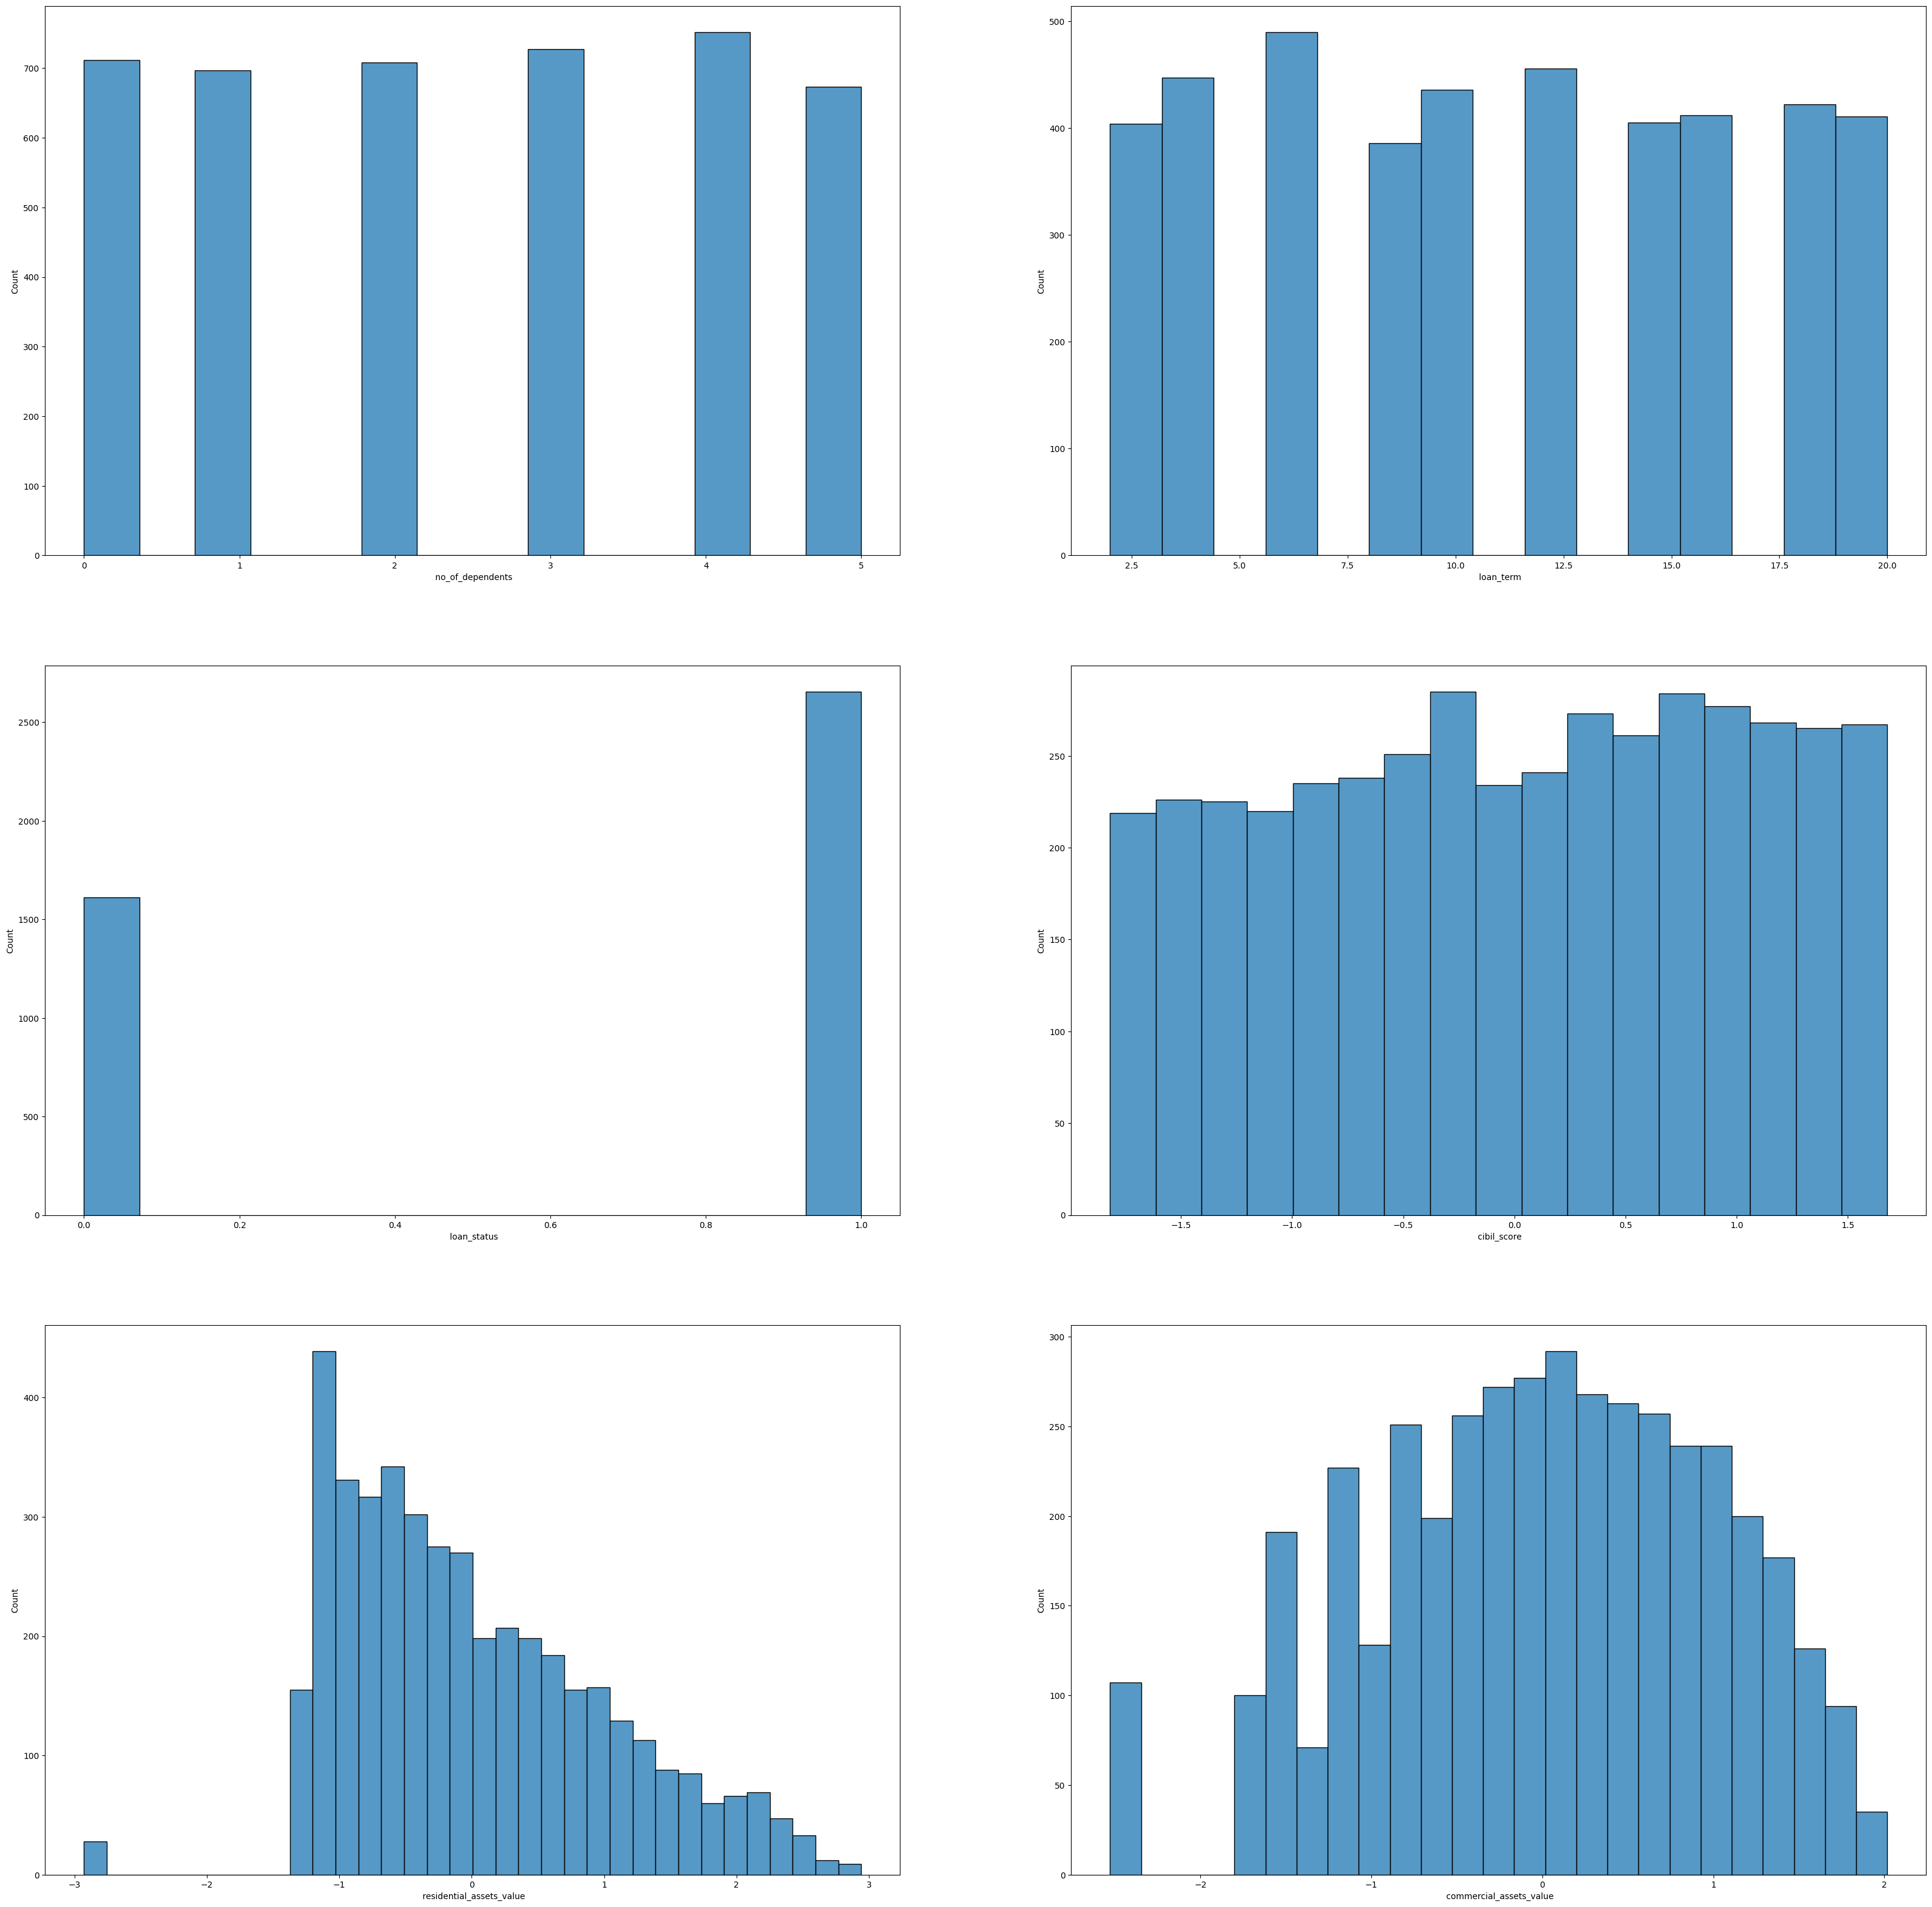

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df_data.columns):
  sns.histplot(df_data[col], ax = ax)

# Prediction Model : SVM

We will try a Lineal SVC without touching hiperparameters.

In [19]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [20]:
x = df_data.drop(" loan_status", axis = 1)
y = df_data[" loan_status"]
# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0, stratify = y)

In [21]:
svmLineal = svm.SVC(probability=True)

In [22]:
svmLineal.fit(x_train, y_train)

SVC(probability=True)

In [23]:
# Validation
y_proba_train_svm = svmLineal.predict_proba(x_train)
y_proba_test_svm = svmLineal.predict_proba(x_test)
y_proba_test_svm

array([[4.01221601e-01, 5.98778399e-01],
       [6.45119714e-01, 3.54880286e-01],
       [9.89758395e-01, 1.02416046e-02],
       ...,
       [9.99849131e-01, 1.50869147e-04],
       [6.18885049e-02, 9.38111495e-01],
       [9.38189153e-01, 6.18108469e-02]])

In [24]:
# ROC Curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

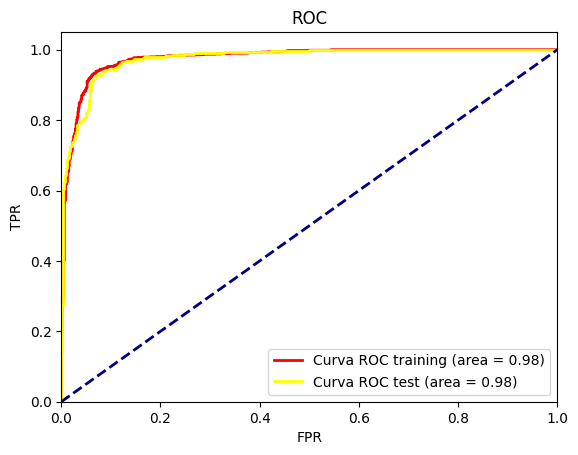

In [25]:
# Graphic
plt.figure()
lw = 2
plt.plot(fpr_train_svm, tpr_train_svm, color = "red", lw = lw, label = "Curva ROC training (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm, tpr_test_svm, color = "yellow", lw = lw, label = "Curva ROC test (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1],[0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

## GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"kernel":["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10,20]},
    {"kernel":["linear"],"C": [0.1,1,10,20]},
    {"kernel":["poly"], "C": [0.1,1,10,20], "degree" : [2,3]}
]
grid = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    scoring = "roc_auc",
    n_jobs = -1,
    cv = 3,
    verbose = 0,
    return_train_score = True
)

In [27]:
grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 20], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 20], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 20], 'degree': [2, 3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [28]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 20, 'degree': 3, 'kernel': 'poly'}
SVC(C=20, kernel='poly')


We got the best parameters from this function, let's go ahead with them!!

In [29]:
svmPoly = SVC(C = 20, degree = 3, kernel = "poly", probability = True)


In [30]:
svmPoly.fit(x_train, y_train)

SVC(C=20, kernel='poly', probability=True)

In [31]:
y_proba_train_svm = svmPoly.predict_proba(x_train)[:, 1]
y_proba_test_svm = svmPoly.predict_proba(x_test)[:, 1]
y_proba_test_svm

array([6.53016029e-01, 8.94929762e-02, 5.43956260e-03, ...,
       1.71252026e-07, 9.96684014e-01, 1.00000010e-07])

In [32]:
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm)
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm)
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

In [33]:
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

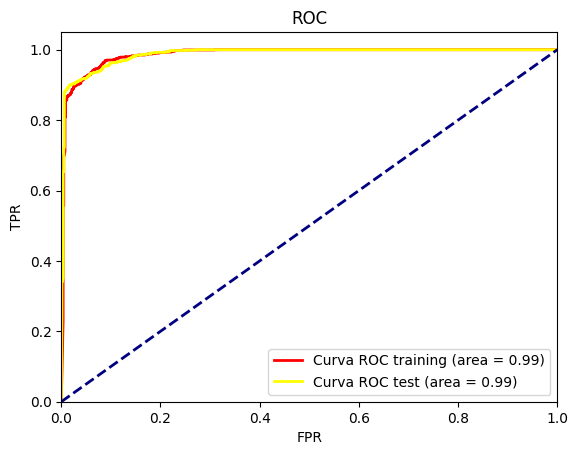

In [34]:
plt.figure()
lw = 2
plt.plot(fpr_train_svm, tpr_train_svm, color = "red", lw = lw, label = "Curva ROC training (area = %0.2f)" % roc_auc_train_svm)
plt.plot(fpr_test_svm, tpr_test_svm, color = "yellow", lw = lw, label = "Curva ROC test (area = %0.2f)" % roc_auc_test_svm)

plt.plot([0, 1],[0, 1], color = "navy", lw = lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

# Conclusion

I am delighted with the results I achieved. Based on my good understanding of the dataset, I made the decision to drop certain variables and encode others. Additionally, I applied the "Yeo-Johnson" method to transform the data into a Gaussian-like distribution. The choice of Support Vector Machine (SVM) as my model proved to be very successful, and through GridSearchCV, I found that PolySVC outperforms LinearSVC. I am thrilled with these results and have great confidence in the model's ability to address the problem at hand.